<a href="https://colab.research.google.com/github/korayyalpp/korayalp-Koray-Alp-DSA210/blob/main/korayalp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
uploaded = files.upload()

Saving dataset - 2020-09-24.csv to dataset - 2020-09-24 (1).csv


In [13]:
import pandas as pd

df = pd.read_csv("dataset - 2020-09-24.csv")
df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [14]:
df = df[['Name', 'Position', 'Yellow cards', 'Red cards']]
df.head()

,Name,Position,Yellow cards,Red cards
0,Bernd Leno,Goalkeeper,2,0
1,Matt Macey,Goalkeeper,0,0
2,Rúnar Alex Rúnarsson,Goalkeeper,0,0
3,Héctor Bellerín,Defender,23,0
4,Kieran Tierney,Defender,2,0


In [15]:
df['card_score'] = df['Yellow cards']*2 + df['Red cards']*3
df.head()

,Name,Position,Yellow cards,Red cards,card_score
0,Bernd Leno,Goalkeeper,2,0,4
1,Matt Macey,Goalkeeper,0,0,0
2,Rúnar Alex Rúnarsson,Goalkeeper,0,0,0
3,Héctor Bellerín,Defender,23,0,46
4,Kieran Tierney,Defender,2,0,4


In [16]:
df['group'] = df['Position'].apply(
    lambda x: 'Defender' if x == 'Defender' else 'Other'
)
df.head()

,Name,Position,Yellow cards,Red cards,card_score,group
0,Bernd Leno,Goalkeeper,2,0,4,Other
1,Matt Macey,Goalkeeper,0,0,0,Other
2,Rúnar Alex Rúnarsson,Goalkeeper,0,0,0,Other
3,Héctor Bellerín,Defender,23,0,46,Defender
4,Kieran Tierney,Defender,2,0,4,Defender


In [17]:
df.isnull().sum()

,0
Name,0
Position,0
Yellow cards,0
Red cards,0
card_score,0
group,0


In [18]:
df.describe(include='all')

,Name,Position,Yellow cards,Red cards,card_score,group
count,571,571,571.000000,571.000000,571.000000,571
unique,571,4,NaN,NaN,NaN,2
top,Leonardo Campana,Midfielder,NaN,NaN,NaN,Other
freq,1,198,NaN,NaN,NaN,377
mean,NaN,NaN,7.917688,0.301226,16.739054,NaN
std,NaN,NaN,11.556811,0.698607,24.432582,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,3.000000,0.000000,7.000000,NaN
75%,NaN,NaN,11.000000,0.000000,22.000000,NaN


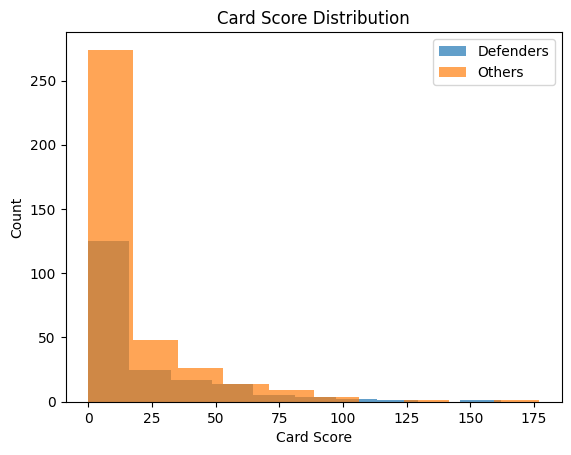

In [19]:
import matplotlib.pyplot as plt

plt.hist(df[df['group']=='Defender']['card_score'], alpha=0.7, label='Defenders')
plt.hist(df[df['group']=='Other']['card_score'], alpha=0.7, label='Others')

plt.legend()
plt.title('Card Score Distribution')
plt.xlabel('Card Score')
plt.ylabel('Count')
plt.show()

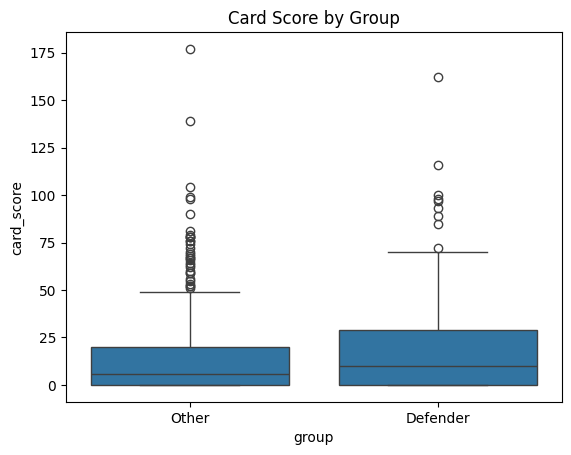

In [20]:
import seaborn as sns

sns.boxplot(data=df, x='group', y='card_score')
plt.title('Card Score by Group')
plt.show()

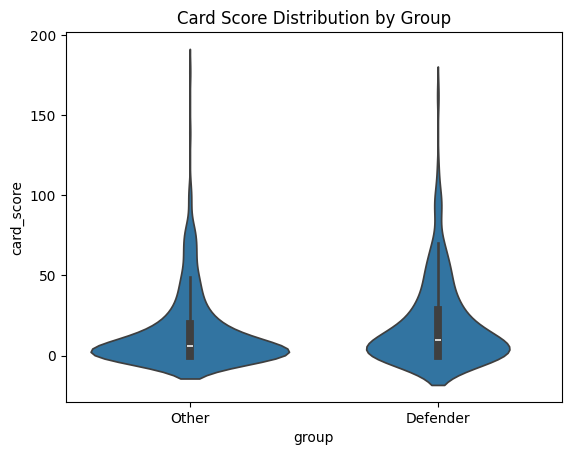

In [21]:
sns.violinplot(data=df, x='group', y='card_score')
plt.title('Card Score Distribution by Group')
plt.show()

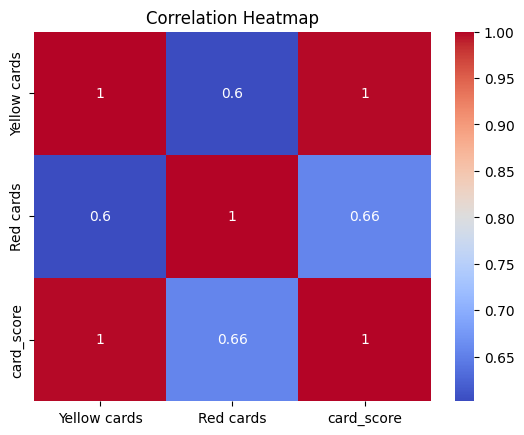

In [22]:
sns.heatmap(df[['Yellow cards','Red cards','card_score']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
from scipy.stats import ttest_ind

defenders = df[df['group']=='Defender']['card_score']
others = df[df['group']=='Other']['card_score']

t_stat, p_val = ttest_ind(defenders, others, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 2.1253311572202636
P-value: 0.03425329322012166


In [24]:
alpha = 0.05

print("P-value:", p_val)

if p_val < alpha:
    print("📌 H0 REDDEDİLDİ → Defenders have significantly higher card scores.")
else:
    print("📌 H0 REDDEDİLEMEDİ → No significant difference between groups.")

P-value: 0.03425329322012166
📌 H0 REDDEDİLDİ → Defenders have significantly higher card scores.


In [25]:
df.to_csv("cleaned_card_data.csv", index=False)

In [26]:
df.shape

(571, 6)